# **Comprehensive Stock Market Analysis and Prediction System**

<p>
The stock analysis and prediction project aims to analyze historical stock market data using exploratory data analysis (EDA) to uncover trends and insights. Machine learning techniques, including Random Forest, are employed to build predictive models, while deep learning models like Long Short-Term Memory (LSTM) networks are utilized to capture temporal dependencies in stock prices. The models are evaluated based on performance metrics such as RMSE and accuracy to assess their predictive accuracy and effectiveness in forecasting future stock movements.
</p>

In [13]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yfinance in c:\users\asles\anaconda3\lib\site-packages (0.2.41)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 2.0 MB/s eta 0:03:19
   ---------------------------------------- 0.2/390.3 MB 1.7 MB/s eta 0:03:53
   ---------------------------------------- 0.3/390.3 MB 1.8 MB/s eta 0:03:34
   ---------------------------------------- 0.4/390.3 MB 1.8 MB/s eta 0:03:41
   ---------------------------------------- 0.4/390.3 MB 1.7 MB/s eta 0:03:47
   ---------------------------------------- 0.5/390.3 MB 1.7 MB/s eta 0:03:51
   ---------------------------------------- 0.6/390.3 MB 1.7 MB/s eta 0:03:47
   ---------------------------------------- 0.7/390.3 MB 1.6 MB/s eta 0

## Using the yfinance Library to Extract Stock Data


In [221]:
import yfinance as yf

In [223]:
ticker_symbol = "AAPL" #defining a ticker symbol

In [225]:
ticker = yf.Ticker(ticker_symbol) #creating a ticker object

In [231]:
data = yf.download(ticker_symbol, start='2015-01-01', end='2025-01-01')
data.to_csv('stock_data.csv')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.347170,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.661274,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.663498,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,23.995317,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.917269,237458000


## Exploratory Data Analysis (EDA)

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

### *Closing Price over Time*

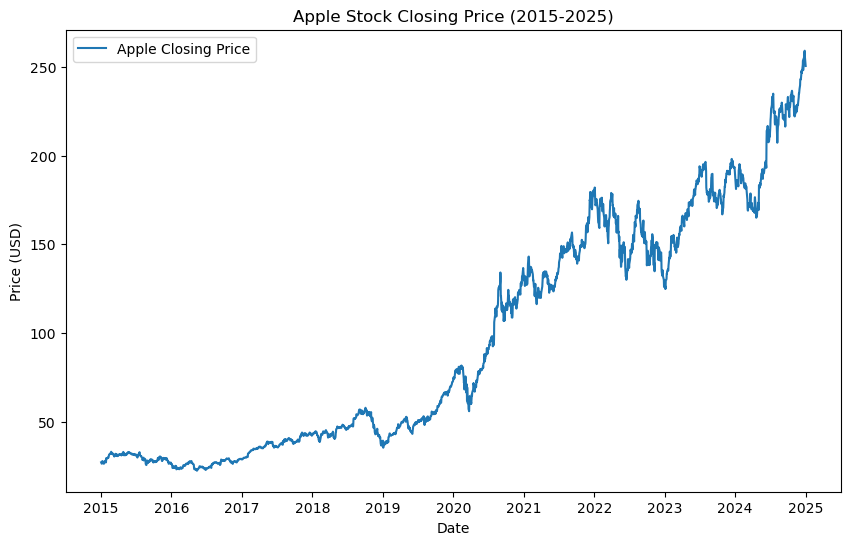

In [245]:
# Plot the Closing Price over time
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Apple Closing Price')
plt.title('Apple Stock Closing Price (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### *Stock Trading Volume over Time*

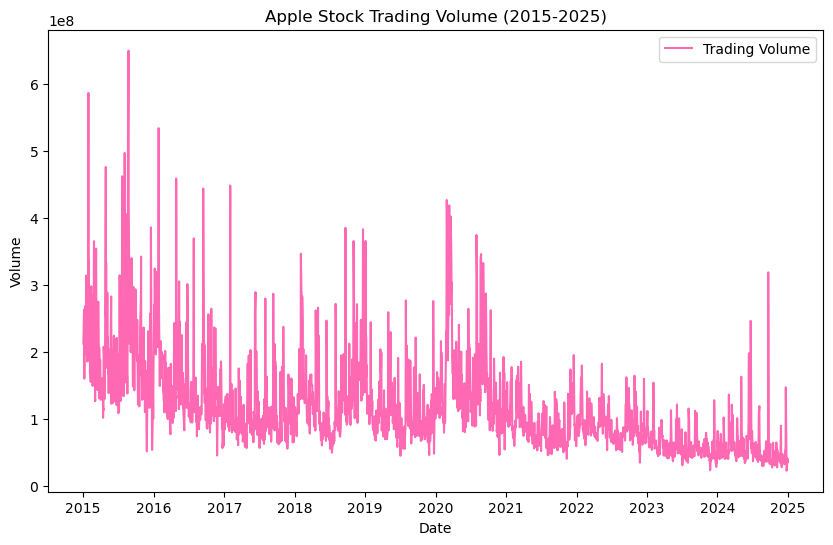

In [249]:
# Plot the Volume over time
plt.figure(figsize=(10,6))
plt.plot(data['Volume'], label='Trading Volume', color='hotpink')
plt.title('Apple Stock Trading Volume (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### *Correlation heatmap*

<p>This code block is used to calculate and visualize the correlation between numerical features in a dataset. 
Correlation measures how strongly two variables are related:
<ul>
<li>1.0: Perfect positive correlation (as one increases, the other increases).</li>
<li>-1.0: Perfect negative correlation (as one increases, the other decreases).</li>
<li>0.0: No correlation (no relationship).</li>
</ul>
In this example:
Features like Open, High, Low, Close, and Volume are passed for correlation analysis.
The result is a correlation matrix: a table showing correlation values between all pairs of features.
sns.heatmap: Creates a heatmap for easy visualization of the correlation matrix.
annot=True: Displays correlation values on the heatmap.
cmap='coolwarm': Uses a color gradient where:
Red represents negative correlation.
Blue represents positive correlation.
White represents near-zero correlation.
</p>

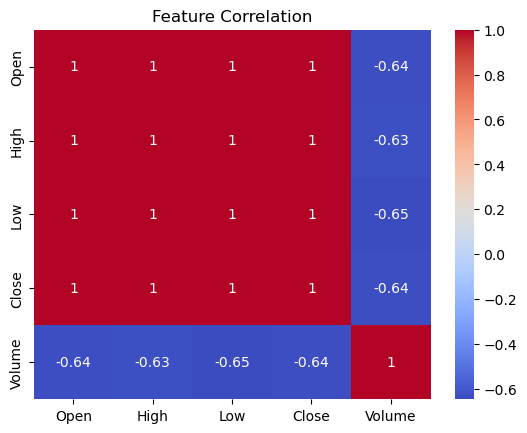

In [53]:
correlation = historical_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

## Feature Engineering

<p>
We will calculate some additional technical indicators, which are commonly used in stock analysis:
<ul>
    <li>Moving Averages (MA): Helps smooth out price data to identify trends - 
        Simple Moving Average (SMA) &
        Exponential Moving Average (EMA)
    </li>
    <li>
        Relative Strength Index (RSI): Measures the magnitude of recent price changes to evaluate overbought or oversold conditions.
    </li>
    <li>
        Bollinger Bands: Measures volatility and provides a range for expected price movement.
    </li>
</ul>
</p>

In [256]:
# Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Exponential Moving Average (EMA)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Relative Strength Index (RSI)
delta = data['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
data['Bollinger_High'] = data['SMA_50'] + (2 * data['Close'].rolling(window=50).std())
data['Bollinger_Low'] = data['SMA_50'] - (2 * data['Close'].rolling(window=50).std())

# Display the updated DataFrame with new features
print(data[['Close', 'SMA_50', 'EMA_50', 'RSI', 'Bollinger_High', 'Bollinger_Low']].tail())


                 Close      SMA_50      EMA_50        RSI  Bollinger_High  \
Date                                                                        
2024-12-24  258.200012  235.914000  238.380336  76.180663      255.927558   
2024-12-26  259.019989  236.417399  239.189735  76.812098      257.458858   
2024-12-27  255.589996  236.893599  239.832882  69.300654      258.574676   
2024-12-30  252.199997  237.294599  240.317867  58.382041      259.355906   
2024-12-31  250.419998  237.602999  240.714029  53.982563      259.962485   

            Bollinger_Low  
Date                       
2024-12-24     215.900442  
2024-12-26     215.375940  
2024-12-27     215.212522  
2024-12-30     215.233293  
2024-12-31     215.243514  


## Train-Test Split

<p>
<ul>
<li>Features (X): Include columns like Open, High, Low, Volume, and engineered features.</li>
<li>Target (y): Use the Close column as the target variable.</li>
</ul>
</p>

In [258]:
from sklearn.model_selection import train_test_split

In [260]:
X = data[['Open', 'High', 'Low', 'Volume']].dropna()
y = data['Close'].loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Prediction Model

<p>
<ul>
<li>1. Machine Learning: For simple regression tasks </li>
<li>2. Deep Learning (LSTM): For time-series data. </li>
</ul>
</p>

### *1. Machine Learning (Random Forest)*

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [268]:
# Feature selection (using 'Open', 'High', 'Low', 'Volume')
X = data[['Open', 'High', 'Low', 'Volume']].dropna()
y = data['Close'].loc[X.index]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 0.5732909440994264
Root Mean Squared Error: 0.9170209120641112


C:\Users\asles\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### *2. Deep Learning (LSTM)*

In [270]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\asles\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 25s 100ms/step - loss: 0.0201
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - loss: 3.4703e-04
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 3.0629e-04
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 2.8349e-04
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 2.7844e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - loss: 2.8026e-04
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 139ms/step - loss: 2.5770e-04
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - loss: 3.0028e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - loss: 2.6784e-04
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 2.2724e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 2.5291e-04
Epoch 12/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 2.1728e-04
Epoch 13/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - loss: 1.8551e-04
Epoch 14/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - loss: 2.2390e-04
Epo

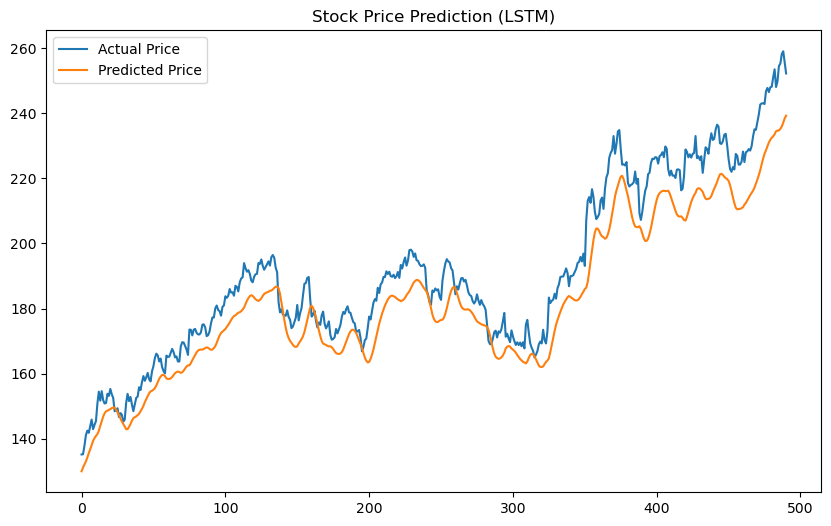

In [272]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare the data for LSTM (sequence data)
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)

# Reshape data for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test = X[:int(0.8 * len(X))], X[int(0.8 * len(X)):]
y_train, y_test = y[:int(0.8 * len(y))], y[int(0.8 * len(y)):]

# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict stock prices
y_pred = model.predict(X_test)

# Inverse transform the predictions to get actual values
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual prices
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred_actual, label='Predicted Price')
plt.legend()
plt.title('Stock Price Prediction (LSTM)')
plt.show()


## Evaluate the Model

### *1. Machine Learning (Random Forest)*

In [279]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the trained Random Forest model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Absolute Error (MAE): 0.03758048046118409
Mean Squared Error (MSE): 0.0018526647214315397
Root Mean Squared Error (RMSE): 0.04304259194601946
R-squared (R²): 0.8542982554117035


C:\Users\asles\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


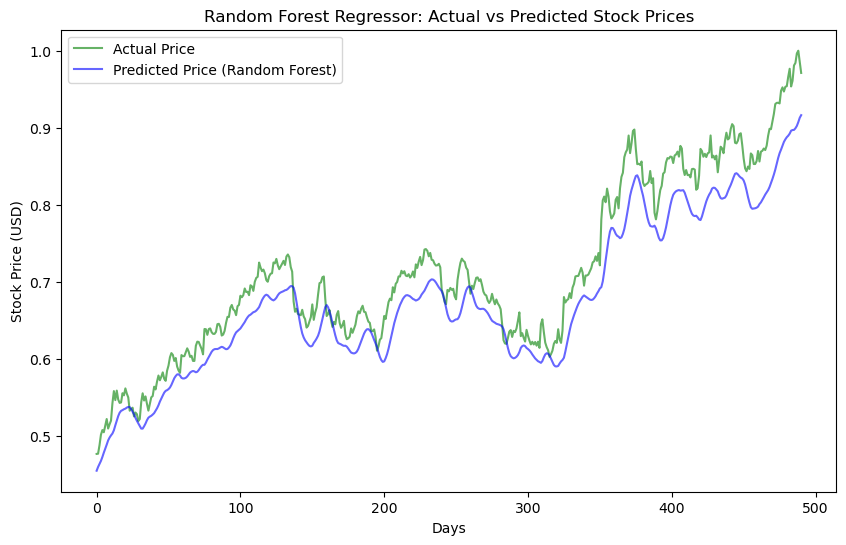

In [285]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price', color='green', alpha=0.6)
plt.plot(y_pred, label='Predicted Price (Random Forest)', color='blue', alpha=0.6)
plt.title('Random Forest Regressor: Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

### *1. Deep Learning (LSTM)*

In [293]:
# Predictions from the LSTM model
y_pred_lstm = model.predict(X_test)

# Inverse scaling to get actual predicted values
y_pred_actual_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_actual_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate model performance
mae_lstm = mean_absolute_error(y_test_actual_lstm, y_pred_actual_lstm)
mse_lstm = mean_squared_error(y_test_actual_lstm, y_pred_actual_lstm)
rmse_lstm = mean_squared_error(y_test_actual_lstm, y_pred_actual_lstm, squared=False)
r2_lstm = r2_score(y_test_actual_lstm, y_pred_actual_lstm)

# Print evaluation metrics for LSTM
print(f"LSTM - Mean Absolute Error (MAE): {mae_lstm}")
print(f"LSTM - Mean Squared Error (MSE): {mse_lstm}")
print(f"LSTM - Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"LSTM - R-squared (R²): {r2_lstm}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step
LSTM - Mean Absolute Error (MAE): 8.885345179291704
LSTM - Mean Squared Error (MSE): 103.56683531416392
LSTM - Root Mean Squared Error (RMSE): 10.176779221058297
LSTM - R-squared (R²): 0.854298128626031


C:\Users\asles\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


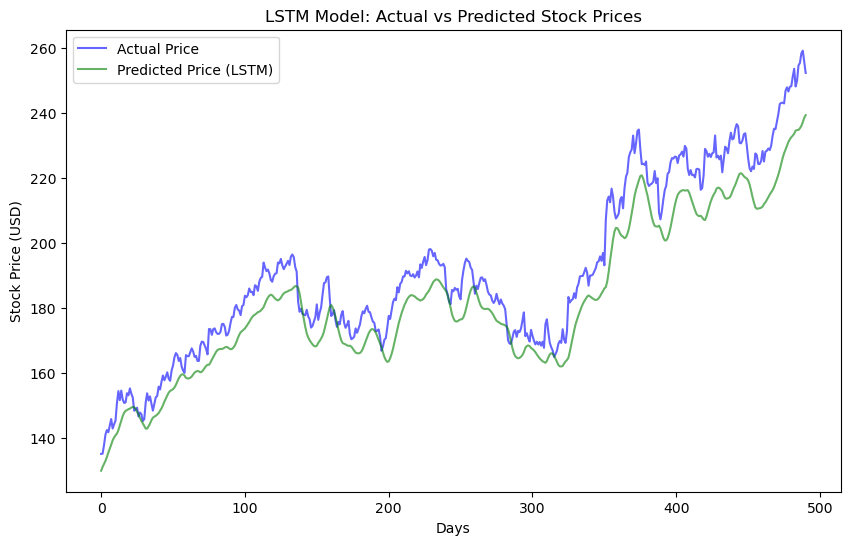

In [295]:
# Visualize Actual vs Predicted Prices for LSTM
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual_lstm, label='Actual Price', color='blue', alpha=0.6)
plt.plot(y_pred_actual_lstm, label='Predicted Price (LSTM)', color='green', alpha=0.6)
plt.title('LSTM Model: Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()